In [33]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In this study, we will attempt to predict the property prices in King County Washington Seattle. We will be using the kc_house_data set from kaggle. The notebook will be following the following format.

Data Cleaning - Investigating the data and addressing the missing values.

Further Data Cleaning - A deeper dive into investigating the data. We will also create new columns and data frame as deemed appropriate.

Exploratory Data Analysis & Seeking answers to our questions 

Running Regression Models to find best predictors for house prices.



In [34]:
#importing the dataset
df = pd.read_csv('kc_house_data.csv')

In [35]:
#checking the head
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [36]:
#initial checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [37]:
#initial checks
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

This section of the notebook will focus on the Data Cleaning.

To begin the data cleaning, we will start with checking the null values

In [38]:
#checking null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64



Looking at the null values, we can see that the following columns contain null values:

-waterfont 

-view 

-yr_renovated 


We will investigate each column in more detail

## Waterfront

In [39]:
#checking unique values
df['waterfront'].unique()

array([nan,  0.,  1.])

The waterfront column is a binary value, 0 representing not waterfront property, 1 representing waterfront property. We have assumed that the null values are not waterfront properties and will change the null values to 0

In [40]:
#filling null values with 0.0
df["waterfront"] = df["waterfront"].fillna(0.0)

## View

Looking into the definition of view, we see that this is the number of times a property was viewed. We do not see this relevant to our house price prediction model, we will remove this column from our dataset entirely.

In [41]:
#dropping row entirely
df.drop(columns='view', inplace=True)

In [42]:
#checking if it dropped
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Yr_renovated

Looking at yr_renovated, it looks like there are quite a few nan values here. We have assumed that this means the property was never renovated. We have decided to replace these nan values with 0. Additionally, we are assuming that the existing 0s means that the property was never renovated.

In [43]:
#checking unique values
df["yr_renovated"].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [44]:
#filling unique values as 0
df["yr_renovated"] = df["yr_renovated"].fillna(0.0)

In [45]:
#checking to see if this worked.
df["yr_renovated"].isna().sum()

0

Now we will check to see if there are any null values remaining.

In [46]:
#it looks like all null values has been removed.
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Further Data Cleaning

In this section, we will look at the other columns which need cleaning.

## Sqft_basement

We can see that sqft_basements has a variable "?". We can see that there are 454 entries with "?". We are assuming that these properties do not have any basement, We will fill these as 0.

In [47]:
#Checking value counts of sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2390.0        1
143.0         1
2190.0        1
588.0         1
2600.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [48]:
#replacing ? with 0.9
df["sqft_basement"].replace(to_replace ="?", 
                 value = "0.0", inplace=True) 

In [49]:
#checking to see if it worked
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2390.0        1
143.0         1
2190.0        1
588.0         1
2600.0        1
Name: sqft_basement, Length: 303, dtype: int64

## Bedroom


We can see that one of the properties has 33 bedrooms, this looks incorrect, we will drop the entire row.

In [50]:
#checking unique values of bedrooms
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [51]:
#dropping the 33 bedroom row.
df = df[df['bedrooms']!=33]

In [52]:
#checking to see if this was removed.
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

# Exploratory Data Analysis

This section will look at exporatory data analysis and will focus on visualisations of the data. We will be creating further columns and sub dataframes as we see appropriate.

We will be looking to answer the following questions and providing other findings during the EDA phase which will shape our approach to the regression model.

Question 1) How do average property prices rank according to Zipcode in King County Washington?

Question 2) Do waterfront properties command a higher price on average?

Question 3) Does the grade of the property matter? And if so is there a case for renovating properties?




Now we will create a new column indicating that the property was renovated with the last 15 years or not.

## Question 1: How do average property prices rank according to Zipcode in King County Washington?

In order to answer this question, we will look to use pandas groupby and aggregate function, grouping the dataframe df by zipcode, and then aggregating the Average prices. This will be saved under a new dataframe zip_price_df.

In [53]:
#creating a groupby aggregate
zip_price_df = df.groupby('zipcode').agg(Av_price=('price','mean')).reset_index().sort_values(by='Av_price',ascending=False)

In [54]:
#changing the zipcode values as strings to plot easily
zip_price_df['zipcode'] = zip_price_df['zipcode'].astype(str)

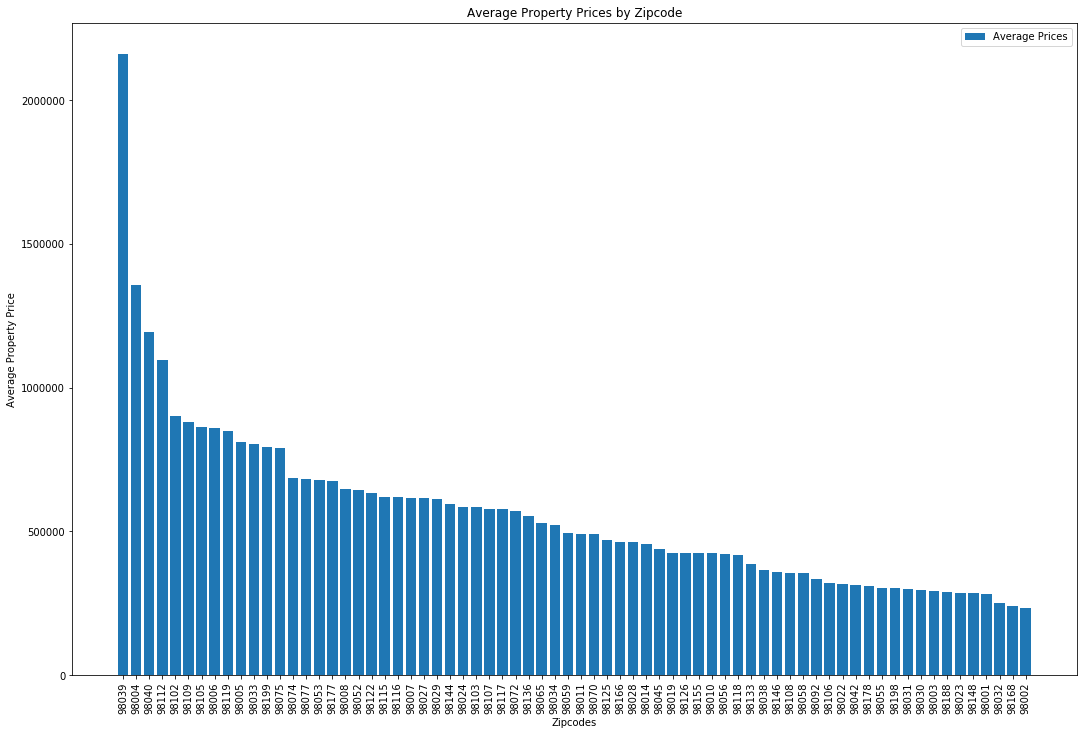

In [55]:
#plotting bar chart
plt.figure(figsize=(18,12))
plt.bar(zip_price_df['zipcode'],zip_price_df['Av_price'],label='Average Prices')
plt.xticks(rotation=90)
plt.xlabel('Zipcodes')
plt.ylabel('Average Property Price')
plt.title("Average Property Prices by Zipcode")
plt.legend()
plt.show()

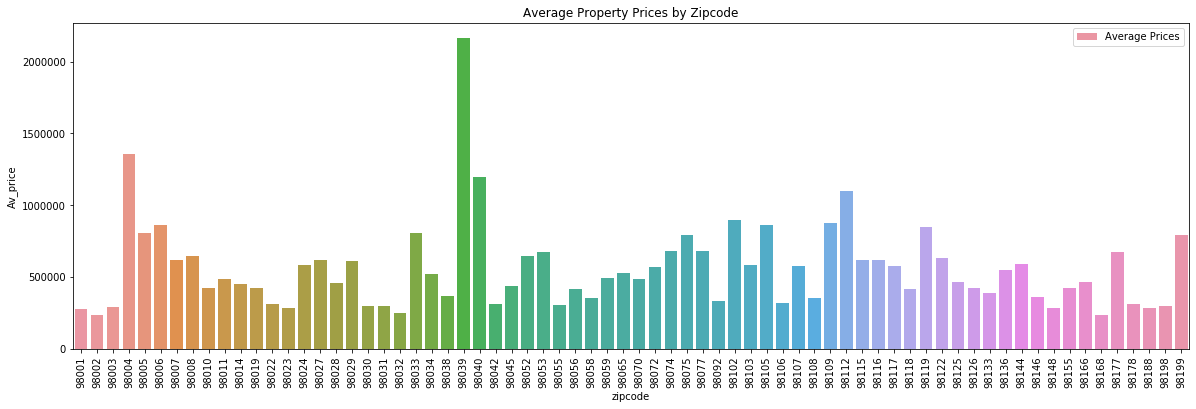

In [56]:
plt.figure(figsize=(20,6))
sns.barplot(zip_price_df['zipcode'],zip_price_df['Av_price'],label='Average Prices')
plt.xticks(rotation=90)
plt.title("Average Property Prices by Zipcode")
plt.legend()
plt.show()

The visualisations above show the average prices by zipcode in King County. The highest average price is USD 2.2m in 98103 which is around the northern part of Seattle. Followed by Bellevue 98004 at USD 1.3m, Mercer Island 98040 at 1.2m, Maddison Park, Seattle 98112 at 1.1m (incidentally where Kurt Cobain lived and killed himself), and Capitol Hill 98102 at USD 900k.

In [57]:
#checking head
zip_price_df.head()

,zipcode,Av_price
24,98039,2.161300e+06
3,98004,1.356524e+06
25,98040,1.194874e+06
48,98112,1.096239e+06
41,98102,8.996077e+05


## Question 2: Does having a waterfront property make a difference?

It would make sense for a waterfront property to command a higher price. We will explore this in further detail here.

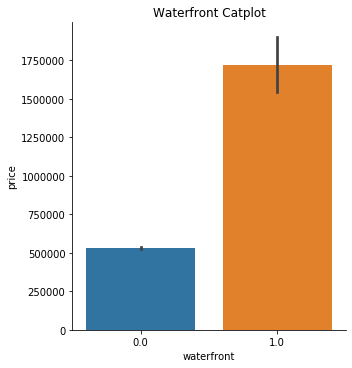

In [58]:
#Plotting caplot
sns.catplot(data=df, x="waterfront", y="price",height=5,kind='bar')
plt.title('Waterfront Catplot')
plt.show()

The visualisation above would suggest that waterfront properties do have higher prices in general. We will explore this in further detail by grouping the property prices by waterfront and non-waterfront. We will then convert calculate the z-score, and compare the distplot to see if there is any truth to this.

In [59]:
#creating separate dataframe splits on waterfront
df_waterfront = df[(df['waterfront']==1)]
df_nonwaterfront = df[(df['waterfront']==0)]

In [60]:
#Calculating Z-score
df_waterfront['z'] = (df_waterfront['price'] - df_waterfront['price'].mean()) / df_waterfront['price'].std()
df_nonwaterfront['z'] = (df_nonwaterfront['price'] - df_nonwaterfront['price'].mean()) / df_nonwaterfront['price'].std()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
print(f"Waterfront Mean: {df_waterfront['price'].mean()}")
print(f"Non-Waterfront Mean: {df_nonwaterfront['price'].mean()}")
print(f"Waterfront Std: {df_waterfront['price'].std()}")
print(f"Non-Waterfront Std: {df_nonwaterfront['price'].std()}")

Waterfront Mean: 1717214.7260273972
Non-Waterfront Mean: 532281.2003729604
Waterfront Std: 1145384.8566607884
Non-Waterfront Std: 342815.3891289751


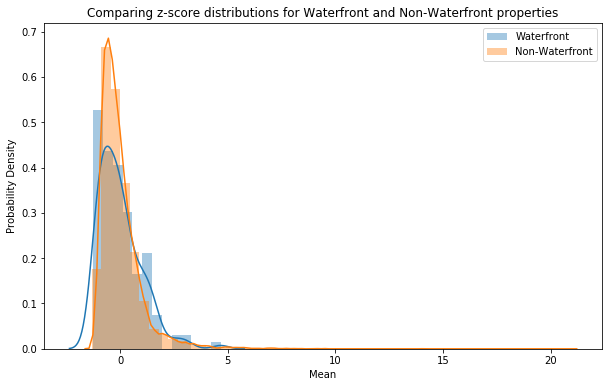

In [93]:
#plotting z-scores for each distribution
plt.figure(figsize=(10,6))
sns.distplot(df_waterfront['z'],label='Waterfront')
sns.distplot(df_nonwaterfront['z'],label='Non-Waterfront')
plt.title("Comparing z-score distributions for Waterfront and Non-Waterfront properties")
plt.ylabel("Probability Density")
plt.xlabel("Mean")
plt.legend()
plt.show()

Based on the following, it does seem that Waterfront properties have higher average prices. We could confirm this by running a hypothesis test. We will look to use waterfront as a feature in our regression analysis later in this notebook.

## Question 3: Does grade of the building influence the price? And if so is it worth buying derelict properties and renovating them?

In [63]:
#checking unique values
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [64]:
#checking number of unique values.
len(df['grade'].unique())

11

To answer this question, we will explore the variation in price between the different grades. The existing column in the dataframe has 11 unique values ranging from 3 to 13. Following a google search, we were able to find out that grade is defined as below.

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

We will plot the data as a catplot using seaborn to look further into this

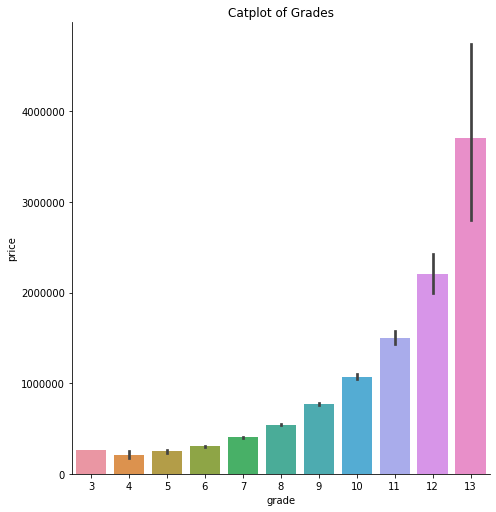

In [65]:
sns.catplot(data=df, x="grade", y="price",height=7,kind='bar')
plt.title("Catplot of Grades")
plt.show()

The visualisation above clearly shows property prices improving as they move up the grade scale.

In [66]:
#Grouping it by average prices.
df.groupby('grade').agg(Av_price=('price','mean'))

,Av_price
grade,
3,2.620000e+05
4,2.120019e+05
5,2.485240e+05
6,3.019166e+05
7,4.025681e+05
8,5.429868e+05
9,7.737382e+05
10,1.072347e+06
11,1.497792e+06


The average price for below average properties are around USD 300k, whereas properties of high quality on the scale averages at around USD 3.7m. Based on this, there does appear to be evidence that grade does have a positive impact on the price.

We will now see if it is worth renovating the property by looking at the difference in average prices between properties that have been renovated, and properties that have not.

We will do this by creating a new binary column 'renovated' which shows values 1 and 0 indicating whether a property has been renvoated or not.

In [67]:
#Checking unique values.
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [68]:
#Creating dataframe splits based on yr_renovated or not
df_renovated = df[(df['yr_renovated']==0)]
df_nonrenovated = df[df['yr_renovated']!=0]

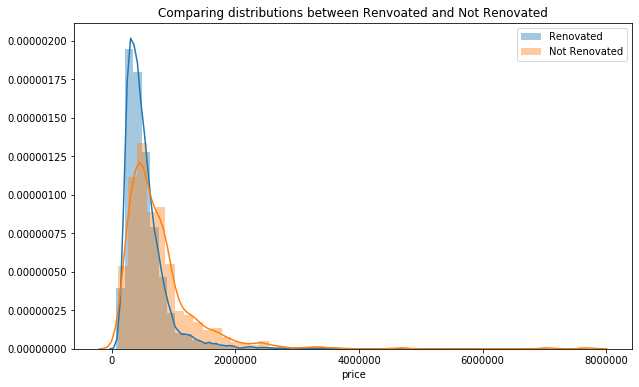

In [69]:
plt.figure(figsize=(10,6))
sns.distplot(df_renovated['price'],label="Renovated")
sns.distplot(df_nonrenovated['price'],label="Not Renovated")
plt.title("Comparing distributions between Renvoated and Not Renovated")
plt.legend()
plt.show()

In [70]:
#Calculating the z-scores
df_renovated['z'] = (df_renovated['price'] - df_renovated['price'].mean()) / df_renovated['price'].std()
df_nonrenovated['z'] = (df_nonrenovated['price'] - df_nonrenovated['price'].mean()) / df_nonrenovated['price'].std()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


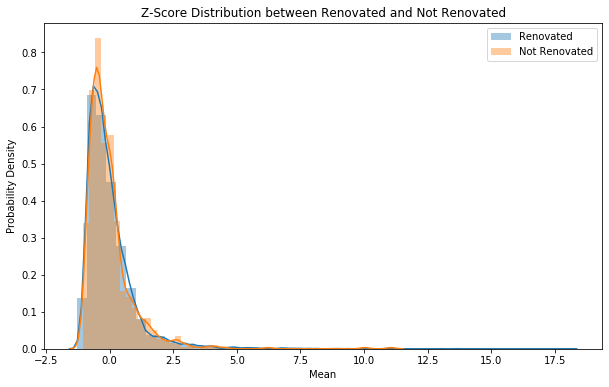

In [92]:
plt.figure(figsize=(10,6))
sns.distplot(df_renovated['z'],label='Renovated')
sns.distplot(df_nonrenovated['z'],label='Not Renovated')
plt.title("Z-Score Distribution between Renovated and Not Renovated")
plt.ylabel("Probability Density")
plt.xlabel("Mean")
plt.legend()
plt.show()

We would need to run some hypothesis testing to confirm this.

Properties renovated after 2000 - We will look to create a new binary column on the dataframe indicating this, with 1 representing properties which were renovated after 2000 and 0 representing properties that were not

In [74]:
#Creating a new column, assigning binary values.
df.loc[(df['yr_renovated']<2000),'renovate_15'] = 0
df.loc[(df['yr_renovated']>=2000),'renovate_15'] = 1

In [75]:
#Checking to see if it worked
df['renovate_15'].unique()

array([0., 1.])

Basement - We will also create a binary column on the dataframe showing properties with or without Basements. 1 representing properties which have basments and 0 representing properties which do not.

In [76]:
df['sqft_basement']= df['sqft_basement'].astype(float)

In [77]:
#Doing the same for basement.
df.loc[(df['sqft_basement']== 0.0),'basement'] = 0
df.loc[(df['sqft_basement'] > 0.0),'basement'] = 1

In [78]:
#Checking to see if it worked.
df['basement'].unique()

array([0., 1.])

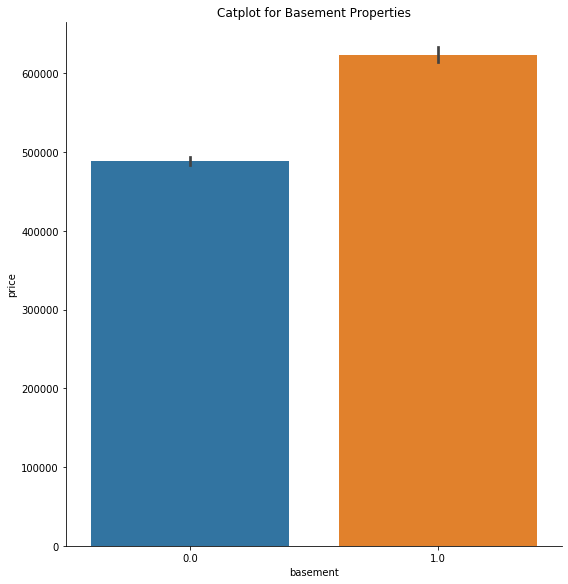

In [82]:
sns.catplot(data=df, x="basement", y="price",height=8,kind='bar')
plt.title("Catplot for Basement Properties")
plt.show()

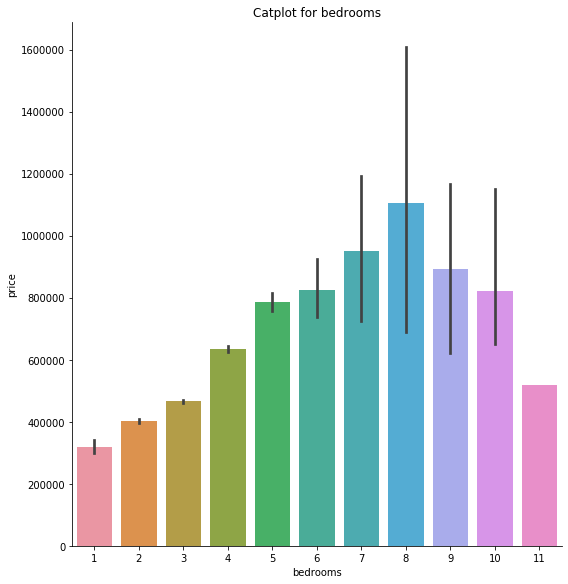

In [83]:
sns.catplot(data=df, x="bedrooms", y="price",height=8,kind='bar')
plt.title("Catplot for bedrooms")
plt.show()

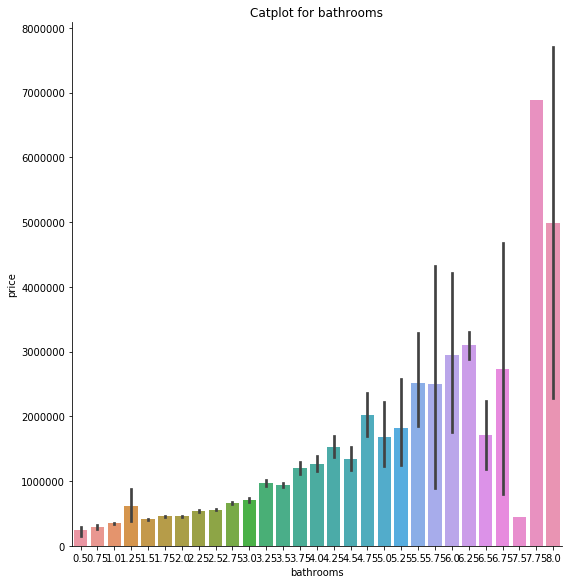

In [84]:
sns.catplot(data=df, x="bathrooms", y="price",height=8,kind='bar')
plt.title("Catplot for bathrooms")
plt.show()

# Categorical Data

This Section will focus on dealing with the categorial data we have in the dataframe.

In order to ascertain which variables are categorical, we will use matplotlib to plot scatter diagrams.

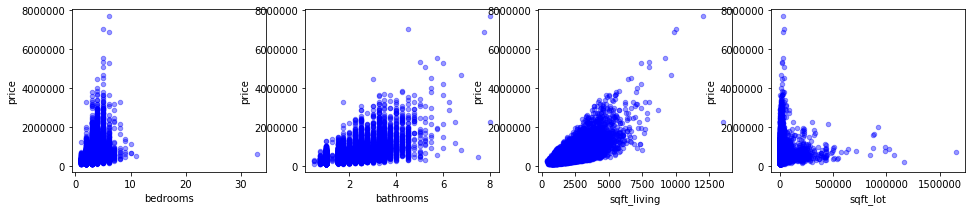

In [475]:
#Function to plot scatter diagram for each column
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df.iloc[:,3:7], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

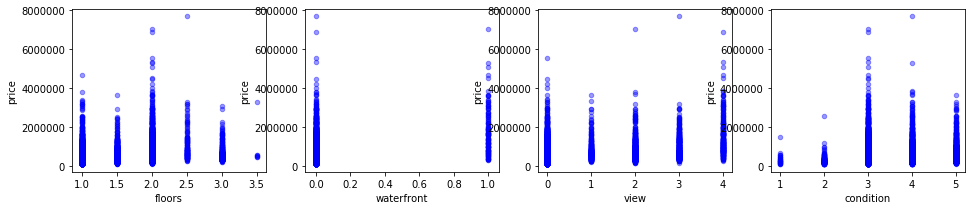

In [478]:
#Function to plot scatter diagram for each column
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df.iloc[:,7:11], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

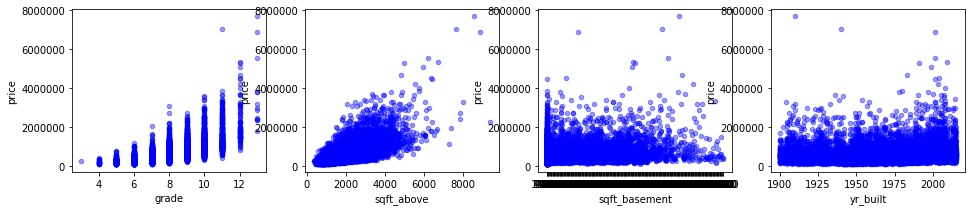

In [479]:
#Function to plot scatter diagram for each column
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(df.iloc[:,11:15], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Based on the diagrams above, we can conclude that the columns floors, waterfront, view, condition and grade all look like categorical data.

Out of these variables, we will leave waterfront as it is, as it is a binary value. We will also keep floors and condition as continuous data

We will use on hot encoding to assign values under grade and condition into dummy variables

## Grade

Following a google search, we were able to find out that grade is defined as below.

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

In order to fill the gaps in between, we will use the following scale.

1-3 Bad

4-6 Below Average

7 Average

8-10 Good

11-13 High

We will create a new column on the dataframe assinging these new categorical variables based on their value in the grade column of the dataframe.

In [636]:
#Creating new column grade_cat, assigning values.
df['grade_cat'] = pd.cut(df['grade'], bins=[0,3,6,7,10,13], labels=['Bad','Below Average','Average','Good','High'])

In [638]:
#using LabelBinarizer to assign dummy variables.
lb = LabelBinarizer()
origin_dummies = lb.fit_transform(df['grade_cat'])
grade_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
grade_dum_df

,Average,Bad,Below Average,Good,High
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
21591,0,0,0,1,0
21592,0,0,0,1,0
21593,1,0,0,0,0
21594,0,0,0,1,0


In [639]:
#We will need to drop one of the columns to avoid the dummy variable trap
grade_dum_df.drop(columns='Bad', inplace=True)

## Condition

We will also convert the condition column into dummy variables.

In [753]:
#using LabelBinarizer to assign dummy variables.
lb = LabelBinarizer()
origin_dummies = lb.fit_transform(df['condition'])
con_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
con_dum_df.head()

,1,2,3,4,5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0


In [125]:
#renaming the column names so that it is easily identifiable
con_dum_df = con_dum_df.rename({1:'con_1',2:'con_2',3:'con_3',4:'con_4',5:'con_5'},axis=1)

In [126]:
#checking if it worked
con_dum_df.head()

,con_1,con_2,con_3,con_4,con_5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0


In [127]:
#We will need to drop one of the columns to avoid the dummy variable trap
con_dum_df.drop(columns='con_5', inplace=True)

We will now need to merge grade_dum_df and con_dum_df with our main df. We will save the new DataFrame as df_merged

In [643]:
#Merged dataframe
df_merged = pd.concat([df,grade_dum_df,con_dum_df],axis=1)

In [644]:
#checking to see if it worked
df_merged.columns

Index([           'id',          'date',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
          'waterfront',     'condition',         'grade',    'sqft_above',
       'sqft_basement',      'yr_built',  'yr_renovated',       'zipcode',
                 'lat',          'long', 'sqft_living15',    'sqft_lot15',
         'renovate_15',      'basement',     'grade_cat',       'Average',
       'Below Average',          'Good',          'High',               1,
                     2,               3,               4,               5],
      dtype='object')

In [645]:
#checking for any nan values.
df_merged.isna().sum()

id               1
date             1
price            1
bedrooms         1
bathrooms        1
sqft_living      1
sqft_lot         1
floors           1
waterfront       1
condition        1
grade            1
sqft_above       1
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
sqft_lot15       1
renovate_15      1
basement         1
grade_cat        1
Average          1
Below Average    1
Good             1
High             1
1                1
2                1
3                1
4                1
5                1
dtype: int64

In [144]:
#dropping nan values.
df_merged = df_merged.dropna()

## Correlation plot

In [194]:
#making a correlation diagram
df_merged.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,renovate_15,basement,Average,Below Average,Good,High,con_1,con_2,con_3,con_4
id,1.000000,-0.016792,0.002253,0.005058,-0.012316,-0.131941,0.018623,-0.003606,-0.023753,0.008142,...,-0.008125,0.003501,-0.009039,-0.020893,0.024597,-0.008669,-0.001237,-0.010068,0.027301,-0.026379
price,-0.016792,1.000000,0.315939,0.525910,0.701925,0.089871,0.256853,0.264308,0.036014,0.667959,...,0.106003,0.178237,-0.235627,-0.186600,0.246081,0.340538,-0.014652,-0.042464,0.002396,-0.022738
bedrooms,0.002253,0.315939,1.000000,0.527812,0.593147,0.033580,0.183787,-0.002060,0.023398,0.366157,...,0.033957,0.160347,-0.079056,-0.217214,0.184265,0.095843,-0.029071,-0.033165,0.007991,-0.010615
bathrooms,0.005058,0.525910,0.527812,1.000000,0.755738,0.088347,0.502698,0.063626,-0.126505,0.665841,...,0.063781,0.159846,-0.244120,-0.324437,0.375870,0.222197,-0.032661,-0.060275,0.163525,-0.142243
sqft_living,-0.012316,0.701925,0.593147,0.755738,1.000000,0.173437,0.354009,0.104634,-0.059433,0.762775,...,0.051027,0.201203,-0.268351,-0.277524,0.343286,0.313010,-0.025620,-0.050285,0.085781,-0.071000
sqft_lot,-0.131941,0.089871,0.033580,0.088347,0.173437,1.000000,-0.004809,0.021457,-0.008816,0.114718,...,-0.013418,-0.034890,-0.052416,-0.011776,0.037675,0.071154,0.006347,0.008654,-0.005960,0.014287
floors,0.018623,0.256853,0.183787,0.502698,0.354009,-0.004809,1.000000,0.020798,-0.263994,0.458820,...,0.004076,-0.252400,-0.248732,-0.206218,0.341112,0.109415,-0.019515,-0.050970,0.272176,-0.219676
waterfront,-0.003606,0.264308,-0.002060,0.063626,0.104634,0.021457,0.020798,1.000000,0.016657,0.082815,...,0.014794,0.039224,-0.037449,-0.002922,0.013221,0.084885,0.012405,-0.000955,-0.015133,0.007213
condition,-0.023753,0.036014,0.023398,-0.126505,-0.059433,-0.008816,-0.263994,0.016657,1.000000,-0.146872,...,-0.072813,0.130402,0.089788,0.060304,-0.113307,-0.043647,-0.098916,-0.151170,-0.701659,0.444857
grade,0.008142,0.667959,0.366157,0.665841,0.762775,0.114718,0.458820,0.082815,-0.146872,1.000000,...,0.035658,0.050717,-0.349878,-0.426645,0.507775,0.342521,-0.042122,-0.070055,0.162093,-0.112917


In [646]:
#Checking which variables ahve correlation >.75
abs(df_merged.corr()>.75)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,basement,Average,Below Average,Good,High,1,2,3,4,5
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


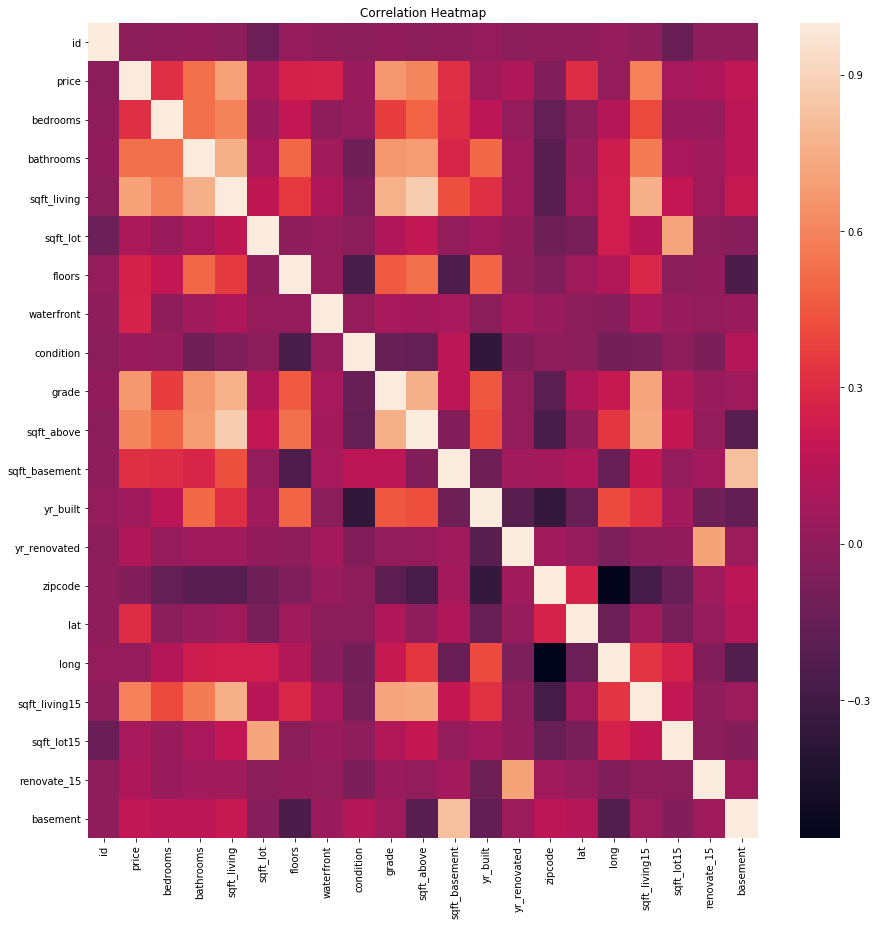

In [720]:
#Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

Now that we have cleaned our data and created the necessary dummy variables, we will look at building a regression model on our data. The data frame that we will work on is df_merged. Correlation plots and heatmaps for this as shown above.

# Regression Models

This section will focus on running a few regression models in order to see which features on the dataframe df_merged we could use to best predict prices in King County Washington.

We will first split the data into a training set and a test set using a 80:20 split.

In [187]:
#save the target variable
target = df_merged['price']

In [177]:
#Set up the train and test variables for X and y.
X_train, X_test, y_train, y_test = train_test_split(df_merged,target, test_size=.2)

In [179]:
#Check shape of each new dataframe.
print("My training set's shape is:", X_train.shape)
print("My target variales shape is:", y_train.shape)
print("My test set's shape is:", X_test.shape)
print("My test set's shape is:", y_test.shape)

My training set's shape is: (17276, 31)
My target variales shape is: (17276,)
My test set's shape is: (4319, 31)
My test set's shape is: (4319,)


In [657]:
#The following is a function we have built to work out regression using statsmodels OLS.
def regression(X,y):
    X_const = sm.add_constant(X)
    model_sm = sm.OLS(y, X_const)
    results = model_sm.fit()
    return results.summary()

## Baseline model

The baseline model will include the variables sqft_living, waterfront and basement.

In [85]:
#Creating X1 and y1 variables
X1 = df[['sqft_living','waterfront','basement']]
y1 = df['price']

In [88]:
#Running the regression with the selected features
X_const = sm.add_constant(X1)
model_sm = sm.OLS(y1, X_const)
results_1 = model_sm.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     8139.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:43:45   Log-Likelihood:            -2.9921e+05
No. Observations:               21596   AIC:                         5.984e+05
Df Residuals:                   21592   BIC:                         5.985e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.739e+04   4291.221     -8.713      0.000   -4.58e+04    -2.9e+04
sqft_living   270.0042      1.914    141.083      0.000     266.253     273.755
waterfront   8.623e+05    2.1e+04     41.021      0.000    8.21e+05    9.03e+05
basement     2.636e+04   3593.738      7.336      0.000    1.93e+04    3.34e+04
==============================================================================
Omnibus:                    13465.033   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           443794.142
Skew:                           2.477   Prob(JB):                         0.00
Kurtosis:                      24.648   Cond. No.                     2.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
print(results_1.params)

const          -37390.496231
sqft_living       270.004228
waterfront     862256.800839
basement        26363.184368
dtype: float64




$price = 270 * \beta_{sqft_living} + 862,256 * \beta_{waterfront} + 26,363 * \beta_{basement} - 37,390$




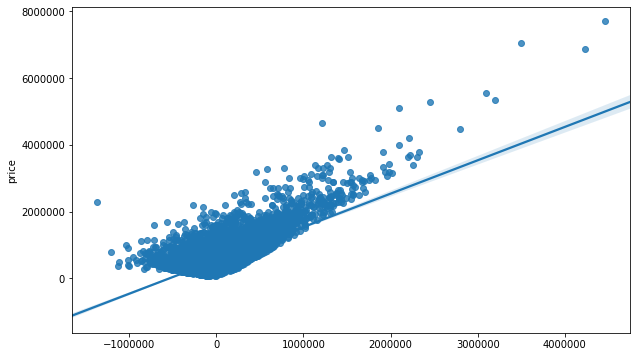

In [723]:
plt.figure(figsize=(10,6))
sns.regplot(results.resid, y1)
plt.show('Diagnostic Plot')
plt.show()

We have run a few iterations of the model. These can be found in the Appendix.

## Final Model

Following multiple iterations, we have found that sqft_living, basement, grade and waterfront provides the best regression fit. We will explore this in more detail below.

In [ ]:
X9 = df_merged[['sqft_living','renovate_15','waterfront','yr_built']]
y9 = df_merged['price']

In [685]:
#Setting up X10 and y10 variables
X10 = df_merged[['sqft_living','renovate_15','waterfront','yr_built']]
y10 = df_merged['price']

In [686]:
#Running the regression using these 2 variables
X_const = sm.add_constant(X10)
model_sm = sm.OLS(y10, X_const)
results_10 = model_sm.fit()
results_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     6853.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:33:12   Log-Likelihood:            -2.9851e+05
No. Observations:               21595   AIC:                         5.970e+05
Df Residuals:                   21590   BIC:                         5.971e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.103e+06   1.18e+05     34.828      0.000    3.87e+06    4.33e+06
sqft_living   293.9264      1.929    152.348      0.000     290.145     297.708
renovate_15  1.241e+05   1.28e+04      9.692      0.000     9.9e+04    1.49e+05
waterfront   8.188e+05   2.04e+04     40.132      0.000    7.79e+05    8.59e+05
yr_built    -2121.9655     60.396    -35.134      0.000   -2240.347   -2003.584
==============================================================================
Omnibus:                    12947.000   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416324.977
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                      23.993   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [687]:
print(results_10.params)

const          4.103498e+06
sqft_living    2.939264e+02
renovate_15    1.240775e+05
waterfront     8.187907e+05
yr_built      -2.121966e+03
dtype: float64


In our Final model the coefs are:

$price = 293 * \beta_{sqft_living} + 124,077 * \beta_{renovate_15} + 818,790 * \beta_{waterfront} - 26,368 * \beta_{yr_built} + 4,100,000$

This means that for every sqft that is added to the property, the property price will go up by USD 293, for every unit increase in renovate_15 it goes up by USD 124,077, by USD26,368 if it is a waterfront property and it goes down in value by USD 2,121 each year.


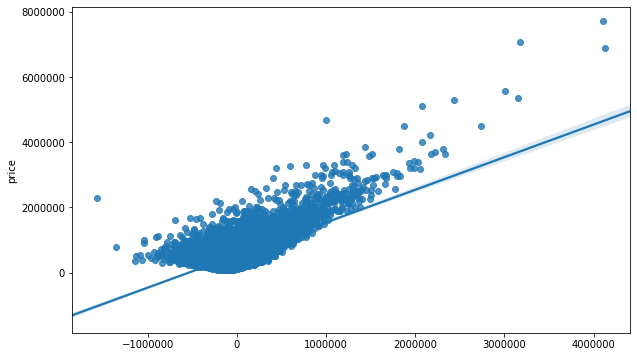

In [724]:
plt.figure(figsize=(10,6))
sns.regplot(results_10.resid, y1)
plt.show('Diagnostic Plot')
plt.show()

The features in X10 provides an improved R-squared value of 0.576. We will now run these features through the test-train split to see if the model suggests low bias.

## Training Data Set

In [690]:
X14 = X_train[['sqft_living','renovate_15','waterfront','yr_built']]
y14 = y_train

In [691]:
X_const = sm.add_constant(X14)
model_sm = sm.OLS(y14, X_const)
results_14 = model_sm.fit()
results_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     5681.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:42:47   Log-Likelihood:            -2.3895e+05
No. Observations:               17276   AIC:                         4.779e+05
Df Residuals:                   17271   BIC:                         4.779e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.097e+06   1.33e+05     30.909      0.000    3.84e+06    4.36e+06
sqft_living   298.8395      2.163    138.162      0.000     294.600     303.079
renovate_15  1.419e+05   1.45e+04      9.792      0.000    1.13e+05     1.7e+05
waterfront   8.634e+05   2.37e+04     36.403      0.000    8.17e+05     9.1e+05
yr_built    -2123.2576     67.947    -31.249      0.000   -2256.441   -1990.074
==============================================================================
Omnibus:                    10489.097   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           347952.372
Skew:                           2.377   Prob(JB):                         0.00
Kurtosis:                      24.466   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Test Data Set

In [695]:
X15 = X_test[['sqft_living','renovate_15','waterfront','yr_built']]
y15 = y_test

In [696]:
X_const = sm.add_constant(X15)
model_sm = sm.OLS(y15, X_const)
results_15 = model_sm.fit()
results_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     1189.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:45:05   Log-Likelihood:                -59523.
No. Observations:                4319   AIC:                         1.191e+05
Df Residuals:                    4314   BIC:                         1.191e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.105e+06   2.55e+05     16.105      0.000    3.61e+06     4.6e+06
sqft_living   272.1359      4.239     64.191      0.000     263.824     280.447
renovate_15  5.948e+04    2.7e+04      2.201      0.028    6488.778    1.12e+05
waterfront   6.784e+05   3.93e+04     17.244      0.000    6.01e+05    7.56e+05
yr_built    -2102.0338    130.648    -16.089      0.000   -2358.171   -1845.897
==============================================================================
Omnibus:                     2310.947   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51047.786
Skew:                           2.076   Prob(JB):                         0.00
Kurtosis:                      19.323   Cond. No.                     2.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our Training Dataset gave us an R-Squared value of 0.568 and the Test Dataset R-Squared of 0.524. This is compared to an R-Squared of 0.559 on the Final Model we had run previously.

## Appendix of Regression Model Iterations:

In [698]:
X2 = X_train[['sqft_living','waterfront','basement']]
y2 = y_train

In [699]:
regression(X2,y2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     6747.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:48:08   Log-Likelihood:            -2.3950e+05
No. Observations:               17276   AIC:                         4.790e+05
Df Residuals:                   17272   BIC:                         4.790e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.595e+04   4819.810     -9.534      0.000   -5.54e+04   -3.65e+04
sqft_living   275.0616      2.148    128.034      0.000     270.851     279.273
waterfront   9.114e+05   2.44e+04     37.288      0.000    8.64e+05    9.59e+05
basement     2.553e+04   4051.064      6.303      0.000    1.76e+04    3.35e+04
==============================================================================
Omnibus:                    10946.000   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           376439.000
Skew:                           2.521   Prob(JB):                         0.00
Kurtosis:                      25.305   Cond. No.                     2.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [700]:
X3 = X_test[['sqft_living','waterfront','basement']]
y3 = y_test

In [701]:
regression(X3,y3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1409.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:48:52   Log-Likelihood:                -59653.
No. Observations:                4319   AIC:                         1.193e+05
Df Residuals:                    4315   BIC:                         1.193e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1283.4662   9359.838      0.137      0.891   -1.71e+04    1.96e+04
sqft_living   247.4868      4.186     59.126      0.000     239.281     255.693
waterfront   7.081e+05   4.05e+04     17.478      0.000    6.29e+05    7.88e+05
basement     3.047e+04   7715.360      3.949      0.000    1.53e+04    4.56e+04
==============================================================================
Omnibus:                     2336.528   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47512.104
Skew:                           2.136   Prob(JB):                         0.00
Kurtosis:                      18.677   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [702]:
X4 = df_merged[['sqft_living', 'sqft_above','renovate_15']]

In [703]:
y4 = df_merged['price']

In [704]:
regression(X4,y4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     7137.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:49:01   Log-Likelihood:            -2.9992e+05
No. Observations:               21595   AIC:                         5.999e+05
Df Residuals:                   21591   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.232e+04   4435.452     -9.541      0.000    -5.1e+04   -3.36e+04
sqft_living   291.2772      4.019     72.466      0.000     283.399     299.156
sqft_above    -14.9591      4.453     -3.359      0.001     -23.687      -6.231
renovate_15  1.942e+05   1.35e+04     14.346      0.000    1.68e+05    2.21e+05
==============================================================================
Omnibus:                    14743.927   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           537219.985
Skew:                           2.805   Prob(JB):                         0.00
Kurtosis:                      26.782   Cond. No.                     2.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [705]:
X7 = df_merged[['sqft_living', 'yr_built','basement','bathrooms']]
y7 = df_merged['price']

In [706]:
regression(X7,y7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     6108.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:49:16   Log-Likelihood:            -2.9919e+05
No. Observations:               21595   AIC:                         5.984e+05
Df Residuals:                   21590   BIC:                         5.984e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.588e+06   1.37e+05     40.745      0.000    5.32e+06    5.86e+06
sqft_living   271.2639      2.881     94.166      0.000     265.618     276.910
yr_built    -2913.5106     70.894    -41.097      0.000   -3052.467   -2774.554
basement    -1.349e+04   3739.923     -3.606      0.000   -2.08e+04   -6157.128
bathrooms    6.432e+04   3800.819     16.923      0.000    5.69e+04    7.18e+04
==============================================================================
Omnibus:                    14481.781   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           535719.797
Skew:                           2.724   Prob(JB):                         0.00
Kurtosis:                      26.785   Cond. No.                     2.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [707]:
X11 = X_train[['sqft_living','basement','grade','waterfront']]
y11 = y_train

In [708]:
regression(X11,y11)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     6028.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:49:30   Log-Likelihood:            -2.3865e+05
No. Observations:               17276   AIC:                         4.773e+05
Df Residuals:                   17271   BIC:                         4.774e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.314e+05   1.46e+04    -43.220      0.000    -6.6e+05   -6.03e+05
sqft_living   170.8353      3.206     53.280      0.000     164.550     177.120
basement     5.284e+04   3910.996     13.512      0.000    4.52e+04    6.05e+04
grade        1.034e+05   2449.198     42.211      0.000    9.86e+04    1.08e+05
waterfront   9.093e+05   2.33e+04     39.073      0.000    8.64e+05    9.55e+05
==============================================================================
Omnibus:                    12934.792   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           780595.454
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      35.361   Cond. No.                     2.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [709]:
X12 = X_test[['sqft_living','basement','grade','waterfront']]
y12 = y_test

In [710]:
regression(X12,y12)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1316.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:49:36   Log-Likelihood:                -59405.
No. Observations:                4319   AIC:                         1.188e+05
Df Residuals:                    4314   BIC:                         1.189e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.126e+05   2.82e+04    -21.711      0.000   -6.68e+05   -5.57e+05
sqft_living   142.7221      6.044     23.612      0.000     130.872     154.572
basement     5.587e+04   7369.644      7.581      0.000    4.14e+04    7.03e+04
grade        1.074e+05   4689.215     22.910      0.000    9.82e+04    1.17e+05
waterfront   6.846e+05   3.83e+04     17.888      0.000     6.1e+05     7.6e+05
==============================================================================
Omnibus:                     2675.550   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81039.987
Skew:                           2.449   Prob(JB):                         0.00
Kurtosis:                      23.648   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [585]:
X3 = df[['sqft_living','basement','renovate_15','waterfront', 'zipcode','bathrooms']]
y3 = df['price']

In [713]:
X_const = sm.add_constant(X3)
model_sm = sm.OLS(y3, X_const)
results_3 = model_sm.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1409.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:53:48   Log-Likelihood:                -59653.
No. Observations:                4319   AIC:                         1.193e+05
Df Residuals:                    4315   BIC:                         1.193e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1283.4662   9359.838      0.137      0.891   -1.71e+04    1.96e+04
sqft_living   247.4868      4.186     59.126      0.000     239.281     255.693
waterfront   7.081e+05   4.05e+04     17.478      0.000    6.29e+05    7.88e+05
basement     3.047e+04   7715.360      3.949      0.000    1.53e+04    4.56e+04
==============================================================================
Omnibus:                     2336.528   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47512.104
Skew:                           2.136   Prob(JB):                         0.00
Kurtosis:                      18.677   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This section looks are regression without the 5 most expensive properties fix this and check again

In [715]:
df_test = df_merged.loc[(df_merged['zipcode'] != 98039) & (df_merged['zipcode'] != 98004) & (df_merged['zipcode'] != 98040) &(df_merged['zipcode'] != 98112)]

In [717]:
X5 = df_test[['sqft_living','basement','grade','waterfront']]
y5 = df_test['price']

In [718]:
regression(X5,y5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     7115.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        03:55:20   Log-Likelihood:            -2.8140e+05
No. Observations:               20677   AIC:                         5.628e+05
Df Residuals:                   20672   BIC:                         5.628e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.238e+05    1.1e+04    -47.464      0.000   -5.45e+05   -5.02e+05
sqft_living   130.8954      2.433     53.791      0.000     126.126     135.665
basement     5.309e+04   2915.817     18.206      0.000    4.74e+04    5.88e+04
grade        9.709e+04   1847.021     52.564      0.000    9.35e+04    1.01e+05
waterfront   7.984e+05   1.72e+04     46.390      0.000    7.65e+05    8.32e+05
==============================================================================
Omnibus:                    15164.076   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1336841.442
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      41.985   Cond. No.                     2.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

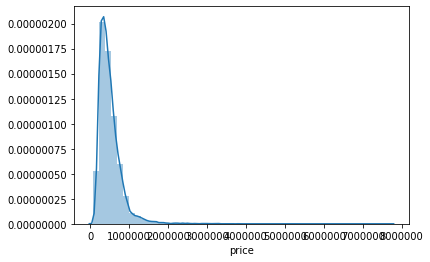

In [217]:
sns.distplot(df_test['price'])

In [218]:
df_test['price'].describe()

count    2.067700e+04
mean     5.077088e+05
std      3.035364e+05
min      7.800000e+04
25%      3.160000e+05
50%      4.400000e+05
75%      6.150000e+05
max      7.700000e+06
Name: price, dtype: float64

In [221]:
df_merged['price'].describe()

count    2.159500e+04
mean     5.403019e+05
std      3.673816e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

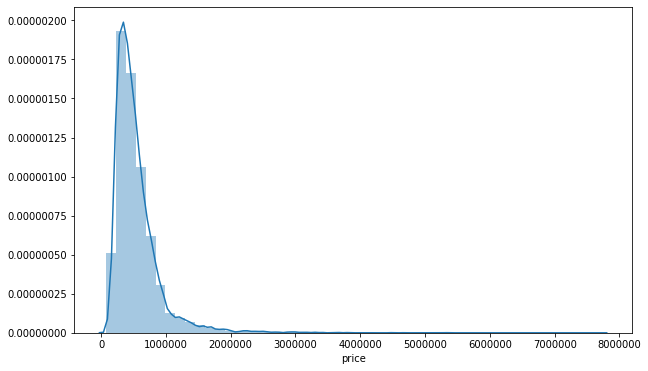

In [224]:
plt.figure(figsize=(10,6))
sns.distplot(df_merged['price'])
plt.show()

In [232]:
df_price_sub_2 = df_merged.loc[(df_merged['price']<2000000)]

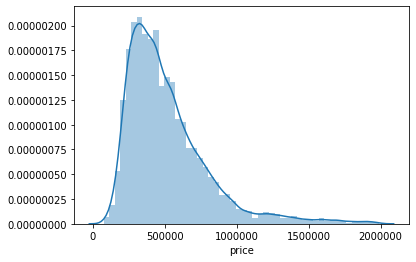

In [233]:
sns.distplot(df_price_sub_2['price'])

In [234]:
df_price_sub_1 = df_merged.loc[(df_merged['price']<1200000)]

In [235]:
len(df_price_sub_1)

20577

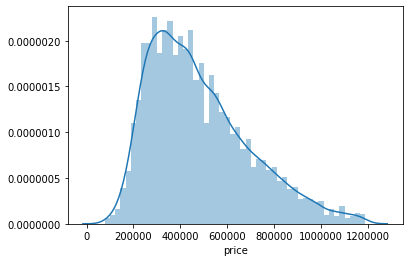

In [236]:
sns.distplot(df_price_sub_1['price'])

In [268]:
X6 = df_price_sub_1[['sqft_living','renovate_15','Good','High','Average']]
y6 = df_price_sub_1['price']

In [269]:
regression(X6,y6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     3005.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:07:09   Log-Likelihood:            -2.7616e+05
No. Observations:               20577   AIC:                         5.523e+05
Df Residuals:                   20571   BIC:                         5.524e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.292e+05   4047.323     31.928      0.000    1.21e+05    1.37e+05
sqft_living   150.3629      1.646     91.372      0.000     147.137     153.588
renovate_15  1.167e+05   9266.528     12.593      0.000    9.85e+04    1.35e+05
Good         8.632e+04   4163.603     20.732      0.000    7.82e+04    9.45e+04
High         1.512e+05   1.09e+04     13.921      0.000     1.3e+05    1.72e+05
Average      2.638e+04   3893.696      6.775      0.000    1.87e+04     3.4e+04
==============================================================================
Omnibus:                     1154.486   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1380.711
Skew:                           0.589   Prob(JB):                    1.52e-300
Kurtosis:                       3.474   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [321]:
X8 = df_price_sub_1[['sqft_living','renovate_15','condition','grade']]
y8 = df_price_sub_1['price']

In [322]:
regression(X8,y8)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     5026.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:50:36   Log-Likelihood:            -2.7479e+05
No. Observations:               20577   AIC:                         5.496e+05
Df Residuals:                   20572   BIC:                         5.496e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.105e+05   1.13e+04    -45.065      0.000   -5.33e+05   -4.88e+05
sqft_living    92.3031      1.931     47.792      0.000      88.517      96.089
renovate_15  1.385e+05   8686.385     15.944      0.000    1.21e+05    1.56e+05
condition    4.579e+04   1675.369     27.329      0.000    4.25e+04    4.91e+04
grade        8.622e+04   1463.756     58.905      0.000    8.34e+04    8.91e+04
==============================================================================
Omnibus:                     1309.913   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1685.915
Skew:                           0.599   Prob(JB):                         0.00
Kurtosis:                       3.730   Cond. No.                     2.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [444]:
X13 = df_price_sub_1[['sqft_living','basement','grade','waterfront']]
y13 = df_price_sub_1['price']

In [445]:
regression(X13,y13)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     4854.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:55:11   Log-Likelihood:            -2.7497e+05
No. Observations:               20577   AIC:                         5.499e+05
Df Residuals:                   20572   BIC:                         5.500e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.475e+05   8917.400    -38.967      0.000   -3.65e+05    -3.3e+05
sqft_living    86.4587      2.002     43.181      0.000      82.534      90.383
basement     4.602e+04   2286.372     20.127      0.000    4.15e+04    5.05e+04
grade        8.474e+04   1476.972     57.371      0.000    8.18e+04    8.76e+04
waterfront   2.627e+05   2.02e+04     12.981      0.000    2.23e+05    3.02e+05
==============================================================================
Omnibus:                     1331.284   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1687.976
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       3.678   Cond. No.                     4.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = df_test[['sqft_living','basement','grade','waterfront']]

In [346]:
X9 = df_merged[['sqft_living','renovate_15','waterfront','yr_built']]
y9 = df_merged['price']

In [347]:
regression(X9,y9)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     6853.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:04:39   Log-Likelihood:            -2.9851e+05
No. Observations:               21595   AIC:                         5.970e+05
Df Residuals:                   21590   BIC:                         5.971e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.103e+06   1.18e+05     34.828      0.000    3.87e+06    4.33e+06
sqft_living   293.9264      1.929    152.348      0.000     290.145     297.708
renovate_15  1.241e+05   1.28e+04      9.692      0.000     9.9e+04    1.49e+05
waterfront   8.188e+05   2.04e+04     40.132      0.000    7.79e+05    8.59e+05
yr_built    -2121.9655     60.396    -35.134      0.000   -2240.347   -2003.584
==============================================================================
Omnibus:                    12947.000   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416324.977
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                      23.993   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

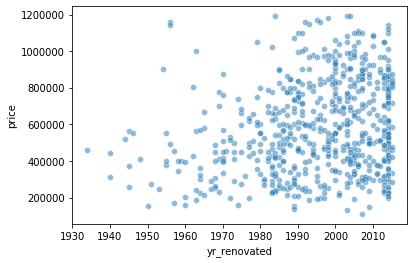

In [368]:
sns.scatterplot(x=df_price_sub_1_ren["yr_renovated"], y=df_price_sub_1_ren["price"],alpha=0.5)

In [354]:
df_renovated = df_merged[df_merged['yr_renovated']>0]

In [355]:
df_renovated.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,basement,grade_cat,Average,Below Average,Good,High,con_1,con_2,con_3,con_4
1,6.414100e+09,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,1.0,Average,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35,9.547205e+09,6/13/2014,696000.0,3.0,2.50,2300.0,3060.0,1.5,0.0,3.0,...,1.0,Good,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
95,1.483301e+09,9/8/2014,905000.0,4.0,2.50,3300.0,10250.0,1.0,0.0,3.0,...,1.0,Average,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103,2.450000e+09,10/7/2014,1090000.0,3.0,2.50,2920.0,8113.0,2.0,0.0,3.0,...,0.0,Good,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
125,4.389201e+09,3/2/2015,1450000.0,4.0,2.75,2750.0,17789.0,1.5,0.0,3.0,...,1.0,Good,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


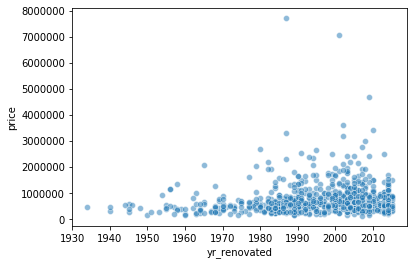

In [357]:
sns.scatterplot(x=df_renovated["yr_renovated"], y=df_renovated["price"],alpha=0.5)

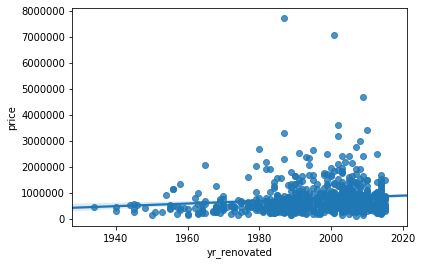

In [359]:
sns.regplot(x=df_renovated["yr_renovated"], y=df_renovated["price"])

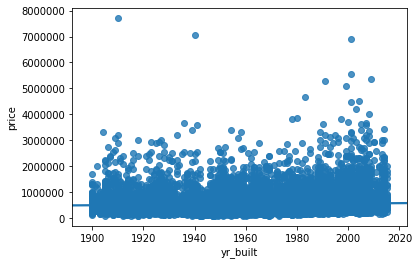

In [364]:
sns.regplot(x=df_merged["yr_built"], y=df_merged["price"])

In [360]:
df_merged.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovate_15', 'basement', 'grade_cat',
       'Average', 'Below Average', 'Good', 'High', 'con_1', 'con_2', 'con_3',
       'con_4'],
      dtype='object')

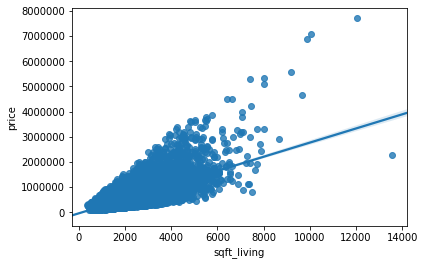

In [362]:
sns.regplot(x=df_merged["sqft_living"], y=df_merged["price"])